In [1]:
import numpy as np
import pandas as pd

## 先設定參數

In [2]:
S = 10
ds = 1 # 股價每次變動1元
M = 20 
T = 0.5 # years
n = 10 
dt = T/n
r = 0.1
q = 0.0
v = 0.1 # volatility

## 計算出最後一期的payoff

In [3]:
ev = np.zeros((M+1, n+1), dtype=np.float64) 
for j in range(M+1):
    ev[j, n] = max((j * ds)**2-100, 0) # power option i=2 的call payoff

In [4]:
ev_df = pd.DataFrame(ev)
ev_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


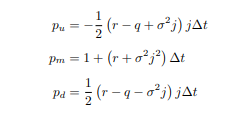

In [5]:
p = np.zeros((M+1, M+1), dtype=np.float64)
p[0, 0] = 1
for j in range(1, M):
    p[j, j-1] = 0.5 * j * dt * (r -q- (v**2)*2 )
    p[j, j] = 1 + ( (v**2) * (j**2) + r) * dt
    p[j, j+1] = -0.5 * j * dt * (r - q + (v**2)*j )
    
p[M, M] = 1

In [6]:
p_df = pd.DataFrame(p)
p_df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.000,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,...,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000
1,0.002,1.0055,-0.00275,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,...,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000
2,0.000,0.0040,1.00700,-0.0060,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,...,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000
3,0.000,0.0000,0.00600,1.0095,-0.00975,0.0000,0.00000,0.0000,0.00000,0.0000,...,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000
4,0.000,0.0000,0.00000,0.0080,1.01300,-0.0140,0.00000,0.0000,0.00000,0.0000,...,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000
5,0.000,0.0000,0.00000,0.0000,0.01000,1.0175,-0.01875,0.0000,0.00000,0.0000,...,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000
6,0.000,0.0000,0.00000,0.0000,0.00000,0.0120,1.02300,-0.0240,0.00000,0.0000,...,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000
7,0.000,0.0000,0.00000,0.0000,0.00000,0.0000,0.01400,1.0295,-0.02975,0.0000,...,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000
8,0.000,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0160,1.03700,-0.0360,...,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000
9,0.000,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.01800,1.0455,...,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000,0.0000,0.00000


## 抓出最後一期的payoff 接著乘以p矩陣的反矩陣

In [7]:
f = ev[:, 10:11]
f

array([[  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [ 21.],
       [ 44.],
       [ 69.],
       [ 96.],
       [125.],
       [156.],
       [189.],
       [224.],
       [261.],
       [300.]])

In [8]:
for i in range(n, 0, -1):
    f = np.linalg.inv(p).dot(f)
    ev[:, i-1] = f.ravel()


## Answer: power option i=2 call
### row 代表股價從0到20
### columns 代表時間從0到半年，中間每隔0.05年

In [9]:
ev_df = pd.DataFrame(ev, columns = ['t=0', 't=0.05', 't=0.1', 't=0.15', '0.2', '0.25', '0.3', '0.35', '0.4', '0.45', '0.5years'])
ev_df.round(4) # 小數點後四位

,t=0,t=0.05,t=0.1,t=0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5years
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
5,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
6,0.0016,0.0011,0.0007,0.0004,0.0002,0.0001,0.0001,0.0000,0.0000,0.0000,0.0
7,0.0245,0.0174,0.0119,0.0078,0.0048,0.0027,0.0014,0.0006,0.0002,0.0000,0.0
8,0.2640,0.2030,0.1514,0.1086,0.0741,0.0474,0.0277,0.0142,0.0058,0.0015,0.0
9,1.9763,1.6521,1.3496,1.0714,0.8197,0.5970,0.4056,0.2478,0.1261,0.0428,0.0


In [10]:
ev = np.zeros((M+1, n+1), dtype=np.float64) 
for j in range(M+1):
    ev[j, n] = max(1000 - (j * ds)**3, 0) # power option i=3的 put payoff
    
p = np.zeros((M+1, M+1), dtype=np.float64)
p[0, 0] = 1
for j in range(1, M):
    p[j, j-1] = 0.5 * j * dt * (r -q- (v**2)*2 )
    p[j, j] = 1 + ( (v**2) * (j**2) + r) * dt
    p[j, j+1] = -0.5 * j * dt * (r - q + (v**2)*j )
    
p[M, M] = 1

f = ev[:, 10:11]
for i in range(n, 0, -1):
    f = np.linalg.inv(p).dot(f)
    ev[:, i-1] = f.ravel()


## Answer: power option i=3 put
### row 代表股價從0到20
### columns 代表時間從0到半年，每隔0.05年

In [11]:
ev_df = pd.DataFrame(ev, columns = ['t=0', 't=0.05', 't=0.1', 't=0.15', '0.2', '0.25', '0.3', '0.35', '0.4', '0.45', '0.5years'])
ev_df.round(4) # 小數點後四位

,t=0,t=0.05,t=0.1,t=0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5years
0,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0
1,952.0014,956.6470,961.3046,965.9743,970.6559,975.3497,980.0555,984.7734,989.5035,994.2457,999.0
2,941.9683,946.8921,951.8332,956.7919,961.7681,966.7620,971.7737,976.8032,981.8507,986.9163,992.0
3,912.9986,918.9440,924.9013,930.8705,936.8517,942.8451,948.8509,954.8691,960.9000,966.9435,973.0
4,859.4720,867.0847,874.7063,882.3369,889.9763,897.6246,905.2819,912.9480,920.6230,928.3070,936.0
5,776.0300,785.8586,795.7038,805.5649,815.4415,825.3330,835.2391,845.1592,855.0930,865.0400,875.0
6,658.4852,670.8383,683.2405,695.6896,708.1838,720.7212,733.3002,745.9190,758.5762,771.2703,784.0
7,504.3502,519.0597,533.9095,548.8931,564.0037,579.2352,594.5812,610.0359,625.5939,641.2501,657.0
8,315.5526,331.2322,347.2993,363.7419,380.5467,397.6982,415.1795,432.9719,451.0547,469.4055,488.0
9,112.9293,124.8179,137.4982,151.0004,165.3548,180.5911,196.7385,213.8258,231.8807,250.9302,271.0
